In [6]:
from google.colab import drive

# Mount on Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

# Mount on Google Drive
drive.mount('/content/drive')

def find_file(filename, search_path='/content'):
    result = []
    # Go through all files
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result

# Find the path of 'B0005.mat'
found_files = find_file('working_dataset.pkl')
print("Path:")
for file in found_files:
    print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Path:
/content/drive/.shortcut-targets-by-id/108S4dHNCejGAp0VeUNDyaoy3S6-vh_1I/DeepDiveProject/Dataset/working_dataset.pkl


In [8]:
# Change directory to project folder
os.chdir("/content/drive/.shortcut-targets-by-id/108S4dHNCejGAp0VeUNDyaoy3S6-vh_1I/DeepDiveProject/Dataset/")

In [9]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

## Load and Prepare Data


In [10]:
# Load working dataset
working_data = pickle.load(open("working_dataset.pkl", "rb"))
working_data

,Date,Gasoline Prices (Dollars per Gallon),Net Imports (Thousand Barrels per Day)
0,1993-04-05/1993-04-11,1.068,7970
1,1993-04-12/1993-04-18,1.079,6990
2,1993-04-19/1993-04-25,1.079,7729
3,1993-04-26/1993-05-02,1.086,8437
4,1993-05-03/1993-05-09,1.086,7086
...,...,...,...
1641,2024-09-16/2024-09-22,3.307,-2798
1642,2024-09-23/2024-09-29,3.311,-2829
1643,2024-09-30/2024-10-06,3.303,-3015
1644,2024-10-07/2024-10-13,3.260,-3412


In [11]:
# Convert Date to numeric values (number of days since a fixed date)
working_data['Date_numeric'] = working_data['Date'].dt.start_time.map(lambda x: x.toordinal())

# Define features (X) and target variable (y)
X = working_data[['Date_numeric', 'Net Imports (Thousand Barrels per Day)']]
y = working_data['Gasoline Prices (Dollars per Gallon)']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Performance of our model

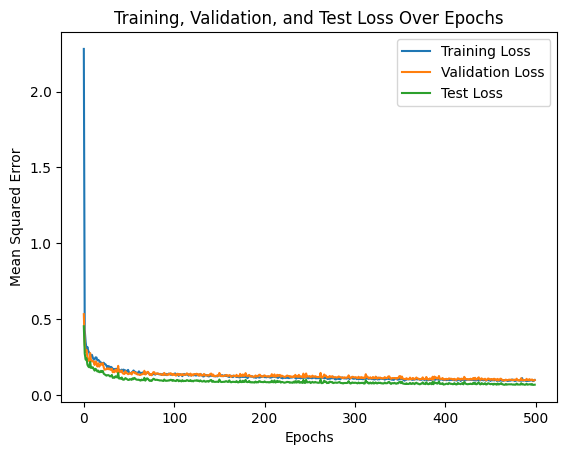

In [12]:
# Define the model
optimal_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='linear')
])

# Compile the model
optimal_model.compile(optimizer='adam', loss='mean_squared_error')

# Initialize lists to store losses
train_losses = []
val_losses = []
test_losses = []

# Train the model for each epoch and record losses
epochs = 500
batch_size = 16

for epoch in range(epochs):
    # Fit for one epoch and save training/validation loss
    history = optimal_model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Record the training and validation loss
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Calculate and record the test loss
    test_loss = optimal_model.evaluate(X_test, y_test, verbose=0)
    test_losses.append(test_loss)

# Plot the training, validation, and test loss over epochs
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training, Validation, and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [13]:
# Make predictions on the test data
y_pred = optimal_model.predict(X_test)

# Calculate Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error (MAE): {test_mae}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Mean Absolute Error (MAE): 0.16817539638461487


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-14-1fbce5223199>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


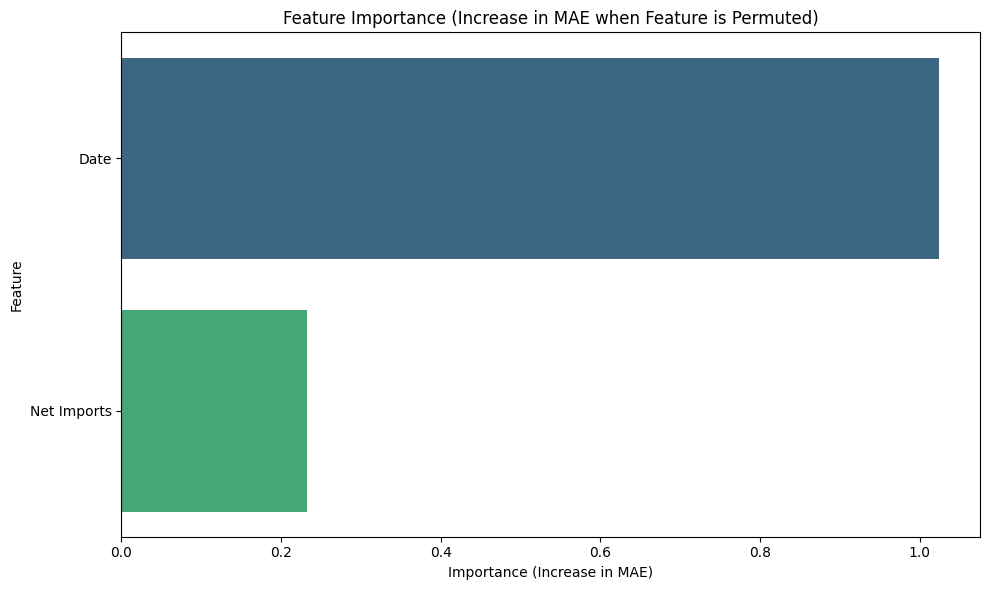


Feature Importance Results:
Date: 1.0246
Net Imports: 0.2323


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

def calculate_permutation_importance(model, X, y, n_repeats=10):
    """
    Calculate permutation importance for features

    Parameters:
    model: trained model
    X: feature matrix
    y: target variable
    n_repeats: number of times to repeat the permutation process

    Returns:
    importance_df: DataFrame with feature importances
    """
    # Calculate baseline performance
    baseline_pred = model.predict(X)
    baseline_mae = mean_absolute_error(y, baseline_pred)

    # Initialize importance scores
    importance_scores = []

    # Calculate importance for each feature
    for column in range(X.shape[1]):
        feature_scores = []

        for _ in range(n_repeats):
            # Create a copy of the data
            X_permuted = X.copy()

            # Permute the feature
            X_permuted[:, column] = np.random.permutation(X_permuted[:, column])

            # Calculate performance with permuted feature
            permuted_pred = model.predict(X_permuted)
            permuted_mae = mean_absolute_error(y, permuted_pred)

            # Calculate importance (increase in error)
            importance = permuted_mae - baseline_mae
            feature_scores.append(importance)

        importance_scores.append(np.mean(feature_scores))

    # Create DataFrame with results
    feature_names = ['Date', 'Net Imports']
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)

    return importance_df

# Calculate feature importance
importance_df = calculate_permutation_importance(optimal_model, X_test, y_test)

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Increase in MAE when Feature is Permuted)')
plt.xlabel('Importance (Increase in MAE)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print numerical results
print("\nFeature Importance Results:")
print("===========================")
for _, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

## The permutation importance analysis reveals:

Date (1.0414) is the most influential feature, demonstrating strong temporal dependency in gasoline prices, where disrupting time information increases prediction error by ~$1.02/gallon.